In [1]:
import pandas as pd

In [2]:
data = [
    {
    'iq':90,
    'cgpa':5,
    'salary':3
},
    {
    'iq':100,
    'cgpa':7,
    'salary':4
},
    {
    'iq':110,
    'cgpa':6,
    'salary':8
},
    {
    'iq':120,
    'cgpa':9,
    'salary':6
},
    {
    'iq':80,
    'cgpa':5,
    'salary':3
}
]

df = pd.DataFrame(data)

In [3]:
df

,iq,cgpa,salary
0,90,5,3
1,100,7,4
2,110,6,8
3,120,9,6
4,80,5,3


In [4]:
df['f0(x)'] = df['salary'].mean()

In [5]:
df

,iq,cgpa,salary,f0(x)
0,90,5,3,4.8
1,100,7,4,4.8
2,110,6,8,4.8
3,120,9,6,4.8
4,80,5,3,4.8


In [6]:
df['res1'] = df['salary'] - df['f0(x)']

In [7]:
df

,iq,cgpa,salary,f0(x),res1
0,90,5,3,4.8,-1.8
1,100,7,4,4.8,-0.8
2,110,6,8,4.8,3.2
3,120,9,6,4.8,1.2
4,80,5,3,4.8,-1.8


In [8]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [9]:
dt1 = DecisionTreeRegressor()
x = df.iloc[:,0:2]
y = df['res1']
dt1.fit(x,y)

DecisionTreeRegressor()

[Text(0.5, 0.8333333333333334, 'x[0] <= 105.0\nsquared_error = 3.76\nsamples = 5\nvalue = 0.0'),
 Text(0.25, 0.5, 'x[0] <= 95.0\nsquared_error = 0.222\nsamples = 3\nvalue = -1.467'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = -1.8'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.8'),
 Text(0.75, 0.5, 'x[0] <= 115.0\nsquared_error = 1.0\nsamples = 2\nvalue = 2.2'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 3.2'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1.2')]

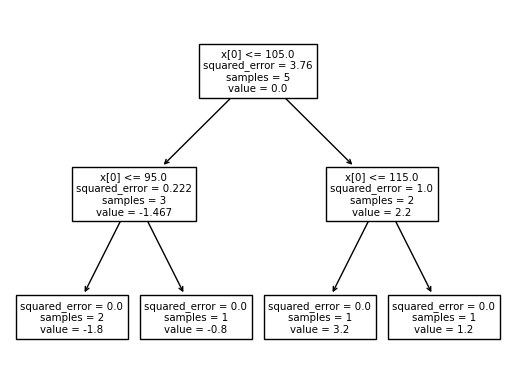

In [10]:
plot_tree(dt1)

In [11]:
pred = dt1.predict(x)

In [13]:
df['f1(x)'] = df['f0(x)'] + pred

In [14]:
df

,iq,cgpa,salary,f0(x),res1,f1(x)
0,90,5,3,4.8,-1.8,3.0
1,100,7,4,4.8,-0.8,4.0
2,110,6,8,4.8,3.2,8.0
3,120,9,6,4.8,1.2,6.0
4,80,5,3,4.8,-1.8,3.0


In [16]:
v = 0.1

In [17]:
df['f1(x)'] = df['f0(x)'] + v*pred

In [18]:
df

,iq,cgpa,salary,f0(x),res1,f1(x)
0,90,5,3,4.8,-1.8,4.62
1,100,7,4,4.8,-0.8,4.72
2,110,6,8,4.8,3.2,5.12
3,120,9,6,4.8,1.2,4.92
4,80,5,3,4.8,-1.8,4.62
